# 2장 퍼셉트론(Perceptron)

목 차

2.1 퍼셉트론이란?

2.2 단순한 논리 회로

      2.2.1 AND 게이트
      2.2.2 NAND 게이트와 OR 게이트

2.3 퍼셉트론 구현하기

     2.3.1 간단한 구현부터
     2.3.2 가중치와 편향 도입
     2.3.3 가중치와 편향 구현하기

2.4 퍼셉트론의 한계

     2.4.1 도전! XOR 게이트
     2.4.2 선형과 비선형

2.5 다층 퍼셉트론이 출동한다면

     2.5.1 기존 게이트 조합하기
     2.5.2 XOR 게이트 구현하기

2.6 NAND에서 컴퓨터까지

퍼셉트론은 프랑크 로젠블라트(Frank Rosenblatt)가 1957년에 고안한 알고리즘
- 퍼셉트론이 신경망(딥러닝)의 기원이 되는 알고리즘
- 퍼셉트론의 구조를 배우는 것은 신경망과 딥러닝으로 나아가는 데 중요한 아이디어를 배우는 일이다.

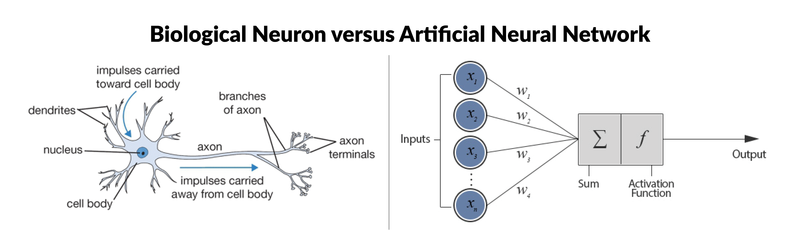

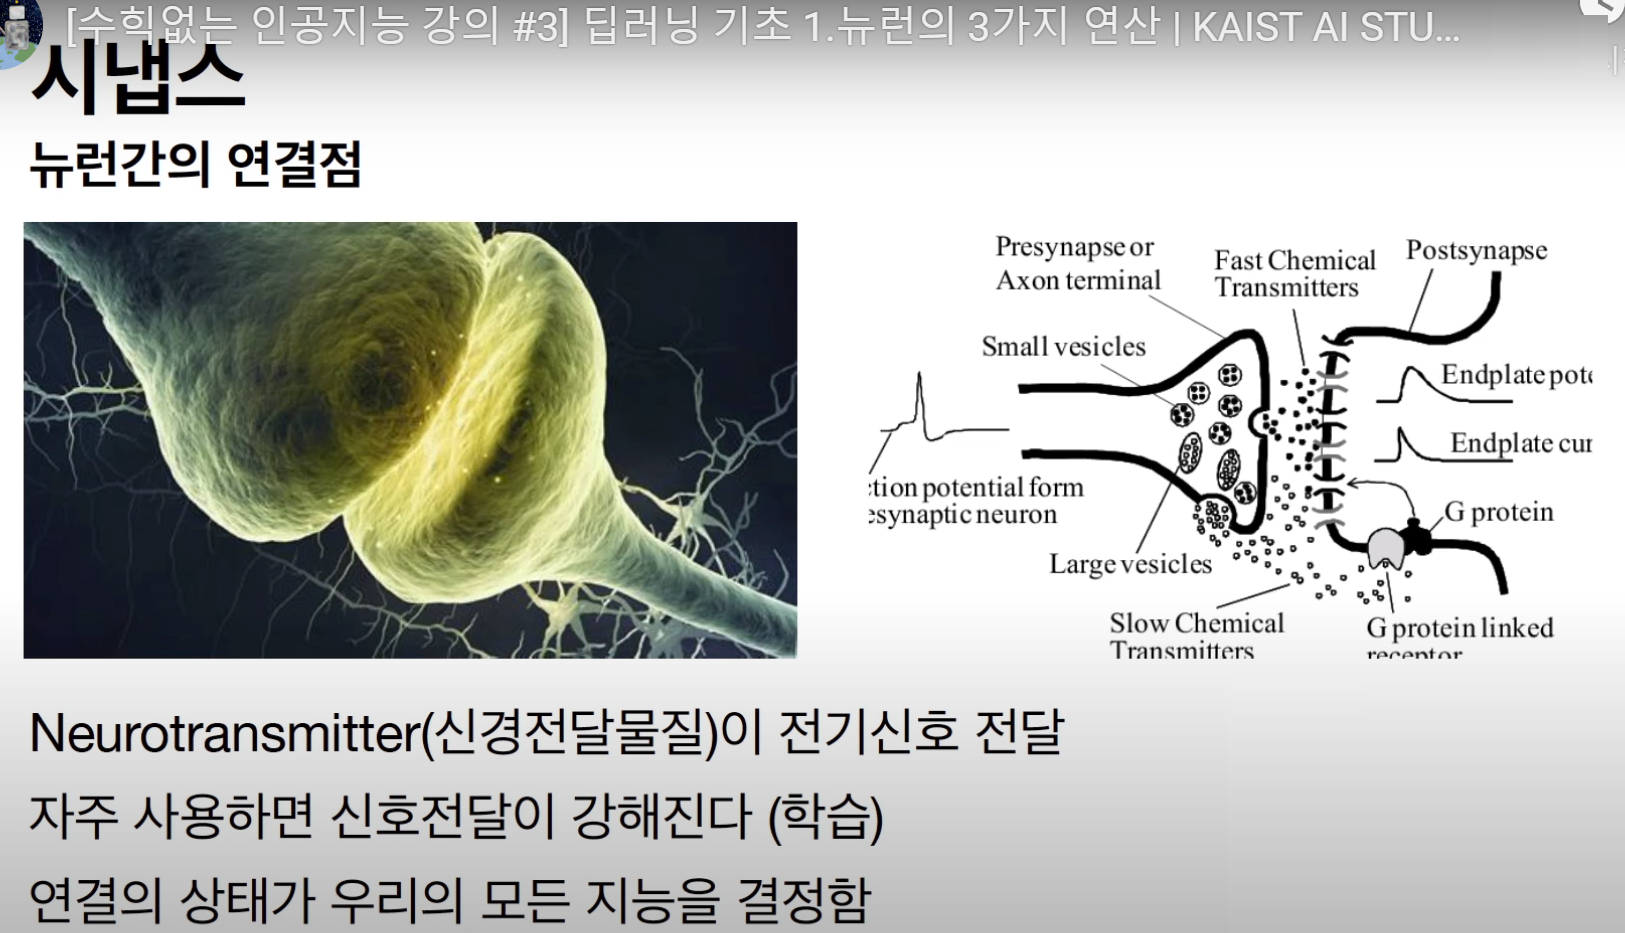

- [신경전달 물질](https://ko.wikipedia.org/wiki/%EC%8B%A0%EA%B2%BD%EC%A0%84%EB%8B%AC%EB%AC%BC%EC%A7%88)

---



##2.1 퍼셉트론이란?


```
다수의 신호를 입력으로 받아 하나의 신호를 출력한다.

신호 : 전류나 강물처럼 흐름이 있는 것

전류가 전선을 타고 흐르는 전자를 보내듯, 퍼셉트론 신호도 흐름을 말들고 정보를 앞으로 전달

실제 전류와 달리 퍼셉트론 신호는 흐른다/안 흐른다(1이나 0)의 두가지 값을 가질 수 있다.
  - 1 : 신호가 흐른다.
  - 0 : 신호가 흐르지 않는다.
  
```



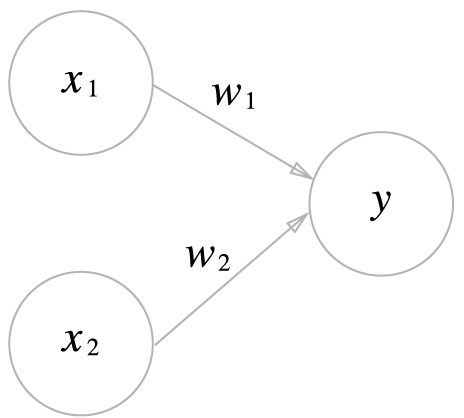

$$
 y=
\begin{cases}
0&(w_{1} x_{1} + w_{2} x_{2} \leq {\theta})\\
1&(w_{1} x_{1} + w_{2} x_{2} > {\theta})
\end{cases}
\tag*{[식 2.1]}
$$




```
입력으로 두개의 신호를 받은 퍼셉트론의 예
 - x1과 x2는 입력신호
 - y는 출력신호
 - w1과 w2는 가중치
 - 그림의 원을 뉴런 혹은 노드라고 부른다.
 - 입력신호가 뉴런에 보내질 때는 각각 고유의 가중치가 곱해진다.(w1x1 + w2x2)
 - 뉴런에서 보내온 신호의 총합이 정해진 한계를 넘어설 때만 1을 출력
 - 한계를 임계값이라한다.

```


```
가중치는 각 신호가 결과에 주는 영향력을 조절하는 요소
가중치가 클 수록 결과에 주는 영향이 크다.
```





##2.2 단순한 논리 회로



### 2.2.1 AND 게이트

AND 게이트 진리표

|$x_1$|$x_2$|y
|----|:---|:--:
|0|0|0
|0|1|0
|1|0|0
|1|1|1

### 2.2.2 NAND 게이트와 OR 게이트

NAND 게이트 진리표

|$x_1$|$x_2$|y
|----|:---|:--:
|0|0|1
|0|1|1
|1|0|1
|1|1|0

OR 게이트 진리표

|$x_1$|$x_2$|y
|----|:---|:--:
|0|0|0
|0|1|1
|1|0|1
|1|1|1


```
 - 각 Gate 별 진리표를 구한다.
 - 각각의 Gate는 퍼셉트론으로 구현이 가능한다.
```

논리회로 진리표

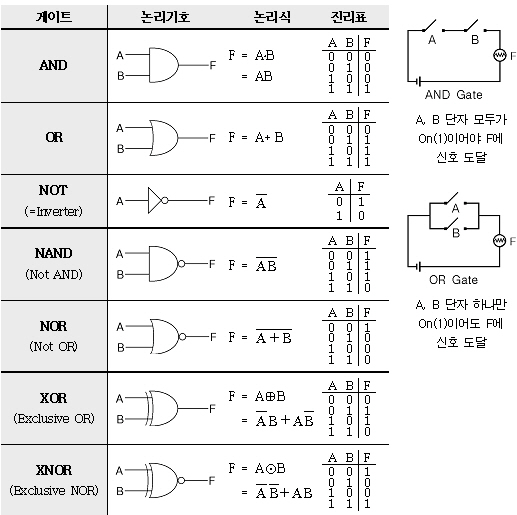

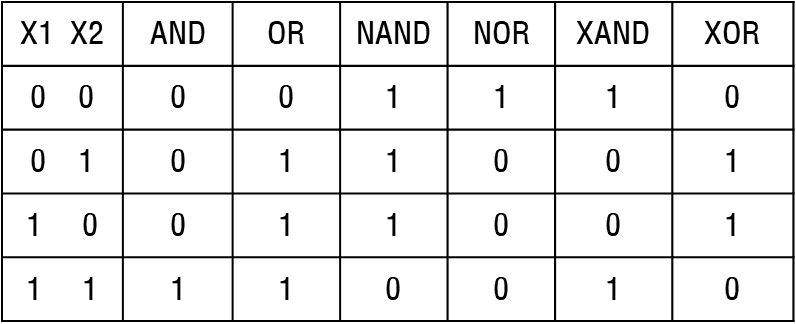

##2.3 퍼셉트론 구현하기



###2.3.1 간단한 구현하기

- AND 함수 : w1, w2, theta 사용 구현

|$x_1$|$x_2$|y
|----|:---|:--:
|0|0|0
|0|1|0
|1|0|0
|1|1|1

In [ ]:
def AND(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.7       # and
    #w1, w2, theta = 0.5, 0.5, 0.2       # or
    #w1, w2, theta = -0.5, -0.5, -0.2    # nor
    #w1, w2, theta = -0.5, -0.5, -0.7    # nand
    tmp = x1 * w1 + x2 * w2
    if tmp <= theta:
        return 0
    elif tmp > theta:
        return 1

print(AND(0, 0))
print(AND(0, 1))
print(AND(1, 0))
print(AND(1, 1))

0
0
0
1


###2.3.2 가중치와 편향 도입


$$
 y=
\begin{cases}
0&(b + w_{1} x_{1} + w_{2} x_{2} \leq 0)\\
1&(b + w_{1} x_{1} + w_{2} x_{2} > 0)
\end{cases}
\tag*{[식 2.2]}
$$

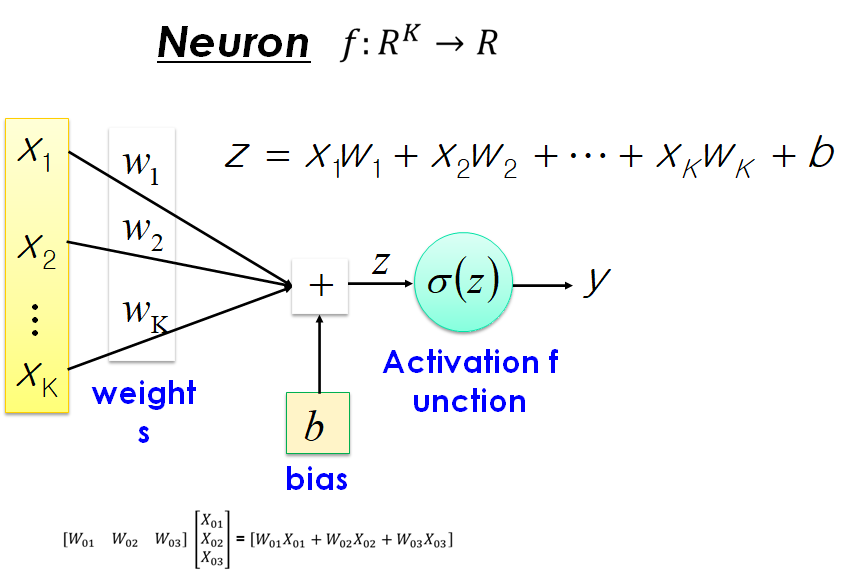

---

###2.3.3 가중치와 편향 구현하기


퍼셉트론을 사용한 논리회로 구현

    퍼셉트론의 파라미터(w1, w2, b)를 조정하여 논리회로를 구현함

AND gate

    (w1, w2, b) = (0.5, 0.5, -0.7)일 때
    AND 게이트 퍼셉트론 식


    가중치(w1, w2)와 편향(b)
\begin{equation*}
z = 0.5x_1 + 0.5x_2 - 0.7
\end{equation*}








    activation function


$$
 y=
\begin{cases}
0&(0.5 x_{1} + 0.5 x_{2} - 0.7 \leq 0)\\
1&(0.5 x_{1} + 0.5 x_{2} - 0.7 > 0)
\end{cases}
$$

SCALAR 연산

In [ ]:
def AND(x1, x2):
    w1, w2, b = 0.2, 0.2, -0.28       # and
    tmp = x1 * w1 + x2 * w2 + b
    if tmp <= 0:
        return 0
    elif tmp > 0:
        return 1

if __name__ == '__main__':
    for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
        y = AND(xs[0], xs[1])
        print(str(xs) + " -> " + str(y))

(0, 0) -> 0
(1, 0) -> 0
(0, 1) -> 0
(1, 1) -> 1


VECTOR 연산

In [ ]:
# coding: utf-8
import numpy as np

def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
    y = AND(xs[0], xs[1])
    print(str(xs) + " -> " + str(y))

(0, 0) -> 0
(1, 0) -> 0
(0, 1) -> 0
(1, 1) -> 1





OR gate

    (w1, w2, b) = (0.5, 0.5, -0.2)일 때
    OR 게이트 퍼셉트론 식


    가중치(w1, w2)와 편향(b)
\begin{equation*}
z = 0.5x_1 + 0.5x_2 - 0.2
\end{equation*}


    activation function

$$
 y=
\begin{cases}
0&(0.5 x_{1} + 0.5 x_{2} - 0.2 \leq 0)\\
1&(0.5 x_{1} + 0.5 x_{2} - 0.2 > 0)
\end{cases}
$$

In [ ]:
# or_gate.py
# coding: utf-8
import numpy as np

def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.2
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

if __name__ == '__main__':
    for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
        y = OR(xs[0], xs[1])
        print(str(xs) + " -> " + str(y))

(0, 0) -> 0
(1, 0) -> 1
(0, 1) -> 1
(1, 1) -> 1




NAND gate

    (w1, w2, b) = (-0.5, -0.5, 0.7)일 때
    NAND 게이트 퍼셉트론 식


    가중치(w1, w2)와 편향(b)
\begin{equation*}
z = - 0.5x_1 - 0.5x_2 + 0.7
\end{equation*}


    activation function

$$
 y=
\begin{cases}
0&(- 0.5 x_{1} - 0.5 x_{2} + 0.2 \leq 0)\\
1&(-0.5 x_{1} - 0.5 x_{2} + 0.2 > 0)
\end{cases}
$$

In [ ]:
# nand_gate.py
# coding: utf-8
import numpy as np

def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = 0.7
#    b = 0.5
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

if __name__ == '__main__':
    for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
        y = NAND(xs[0], xs[1])
        print(str(xs) + " -> " + str(y))


(0, 0) -> 1
(1, 0) -> 1
(0, 1) -> 1
(1, 1) -> 0


바이어스에 따른 논리회로의 변화

    AND 와 OR

In [ ]:
# coding: utf-8
import numpy as np


def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    #b = -1.0   # all 0
    #b = -0.9   # and
    #b = -0.8   # and
    #b = -0.7   # and original
    #b = -0.6   # and
    #b = -0.5   # and
    #b = -0.4   # or
    #b = -0.3   # or
    #b = -0.2   # or
    #b = -0.1   # or
    #b =  0.0   # or
    b =  0.1   # all 1
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

if __name__ == '__main__':
    for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
        y = AND(xs[0], xs[1])
        print(str(xs) + " -> " + str(y))

(0, 0) -> 1
(1, 0) -> 1
(0, 1) -> 1
(1, 1) -> 1


    NAND 와 NOR

In [ ]:
# coding: utf-8
import numpy as np

def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    #b =  1.2   # all 1
    #b =  1.1   # all 1
    #b =  1.0   # nand
    #b =  0.9   # nand
    #b =  0.8   # nand
    b =  0.7   # nand original
    #b =  0.6   # nand
    #b =  0.5   # nor
    #b =  0.4   # nor
    #b =  0.3   # nor
    #b =  0.2   # nor
    #b =  0.1   # nor
    #b = -0.0   # all 0
    #b = -0.1   # all 0
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

if __name__ == '__main__':
    for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
        y = NAND(xs[0], xs[1])
        print(str(xs) + " -> " + str(y))

(0, 0) -> 1
(1, 0) -> 1
(0, 1) -> 1
(1, 1) -> 0


##2.4 퍼셉트론의 한계


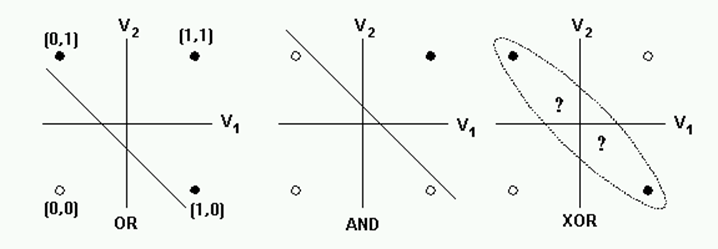

- 증명


$
\left[\begin{array}{rr}
OR        \\
y = 0.5x_1+0.5x_2-0.2\\
\\
y=0 : 0.5x_1 + 0.5x_2 = 0.2\\
\\
x_1절편 :     0.5x_1=0.2\\
x_1=0.4\\,
\\
x_2절편 :     0.5x_2=0.2\\
x_2=0.4
\end{array}\right]
\left[\begin{array}{rr}
AND       \\
y = 0.5x_1+0.5x_2-0.7\\
\\
y=0 : 0.5x_1 + 0.5x_2 = 0.7\\
\\
x_1절편 :     0.5x_1=0.7\\
x_1=1.4\\,
\\
x_2절편 :     0.5x_2=0.7\\
x_2=1.4
\end{array}\right]
\left[\begin{array}{rr}
NOR       \\
y = -0.5x_1-0.5x_2+0.2\\
\\
y=0 : 0.5x_1 + 0.5x_2 = 0.2\\
\\
x_1절편 :     0.5x_1=0.2\\
x_1=0.4\\,
\\
x_2절편 :     0.5x_2=0.2\\
x_2=0.4
\end{array}\right]
\left[\begin{array}{rr}
NAND      \\
y = -0.5x_1-0.5x_2+0.7\\
\\
y=0 : 0.5x_1 + 0.5x_2 = 0.7\\
\\
x_1절편 :     0.5x_1=0.7\\
x_1=1.4\\,
\\
x_2절편 :     0.5x_2=0.7\\
x_2=1.4
\end{array}\right]
$

##2.5 다층 퍼셉트론

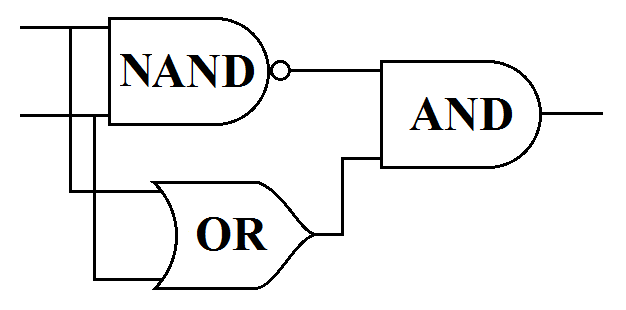

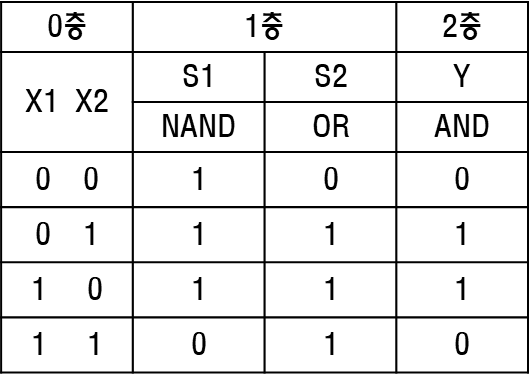

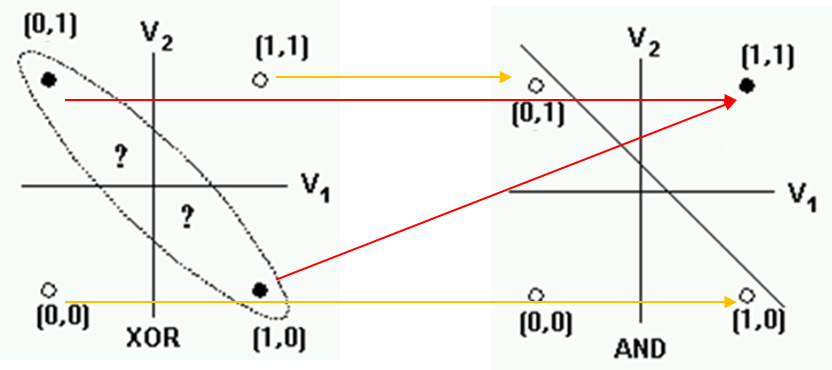

In [ ]:
# coding: utf-8
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)

    y = AND(s1, s2)
    return y

if __name__ == '__main__':
    for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
        y = XOR(xs[0], xs[1])
        print(str(xs) + " -> " + str(y))

(0, 0) -> 0
(1, 0) -> 1
(0, 1) -> 1
(1, 1) -> 0


---

보충 : 퍼셉트론의 시각화

OR

```
퍼셉트론의 시각화: 회색 영역은 0을 출력하는 영역. 전체 영역을 OR 게이트 성질을 만족
```
\begin{equation*}
0.5x_1 + 0.5x_2 - 0.2 = 0
\end{equation*}

\begin{equation*}
x_2 = - x_1 + 0.4
\end{equation*}


\begin{equation*}
(x_1 = 0)  => (x_2 = 0.4)
\end{equation*}
\begin{equation*}
(x_2 = 0)  => (x_1 = 0.4)
\end{equation*}

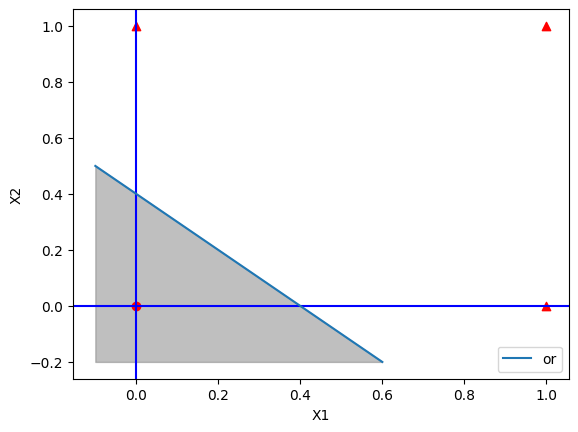

In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import matplotlib

x1 = np.arange(-0.1, 1.1, 0.7)
x2 = -x1 + 0.4

plt.axvline(x=0, color = 'b')  # draw x =0 axes
plt.axhline(y=0, color = 'b')   # draw y =0 axes

# 그래프 그리기
plt.plot(x1, x2, label="or")
plt.xlabel("X1") # x축 이름
plt.ylabel("X2") # y축 이름
plt.legend()

#plt.fill_between(x1, x2, '-3', color='grey', alpha='0.5')
plt.fill_between(x1, x2, -0.2, color='grey', alpha=0.5)

plt.scatter([0],[0],marker='o',color='r')
plt.scatter([1,0,1],[0,1,1],marker='^',color='r')
plt.show()






AND

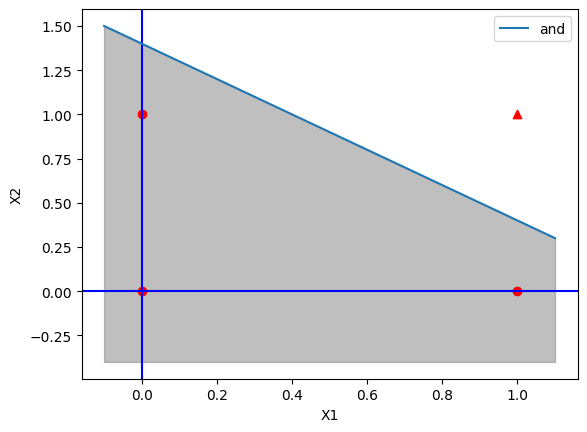

In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import matplotlib

#x1 = np.arange(-0.1, 1.1, 1)
#x2 = -x1 + 0.4
x1 = np.arange(-0.1, 1.3, 0.2)
x2 = -x1 + 1.4

plt.axvline(x=0, color = 'b')  # draw x =0 axes
plt.axhline(y=0, color = 'b')   # draw y =0 axes

# 그래프 그리기
#plt.plot(x1, x2, label="or")
plt.plot(x1, x2, label="and")
plt.xlabel("X1") # x축 이름
plt.ylabel("X2") # y축 이름
plt.legend()

#plt.fill_between(x1, x2, '-3', color='grey', alpha='0.5')
plt.fill_between(x1, x2, -0.4, color='grey', alpha=0.5)

#plt.scatter([0],[0],marker='o',color='r')
#plt.scatter([1,0,1],[0,1,1],marker='^',color='r')
plt.scatter([0,1,0],[0,0,1],marker='o',color='r')
plt.scatter([1],[1],marker='^',color='r')

plt.show()

NOR

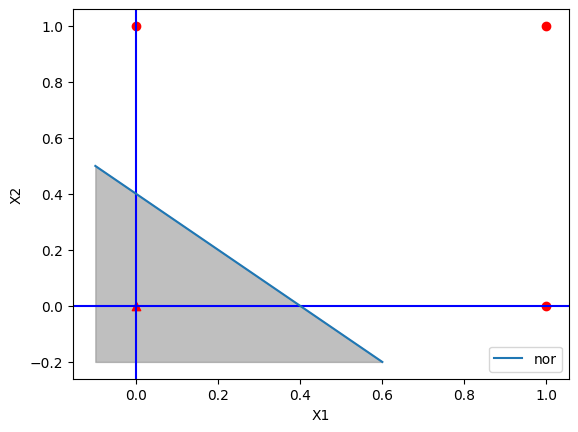

In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import matplotlib

x1 = np.arange(-0.1, 1.1, 0.7)
x2 = -x1 + 0.4

plt.axvline(x=0, color = 'b')   # draw x =0 axes
plt.axhline(y=0, color = 'b')   # draw y =0 axes

# 그래프 그리기
plt.plot(x1, x2, label="nor")
plt.xlabel("X1") # x축 이름
plt.ylabel("X2") # y축 이름
plt.legend()

#plt.fill_between(x1, x2, '-3', color='grey', alpha='0.5')
plt.fill_between(x1, x2, -0.2, color='grey', alpha=0.5)

#plt.scatter([0],[0],marker='o',color='r')
#plt.scatter([1,0,1],[0,1,1],marker='^',color='r')
plt.scatter([1,0,1],[0,1,1],marker='o',color='r')
plt.scatter([0],[0],marker='^',color='r')
plt.show()



```
  


  
```



NAND

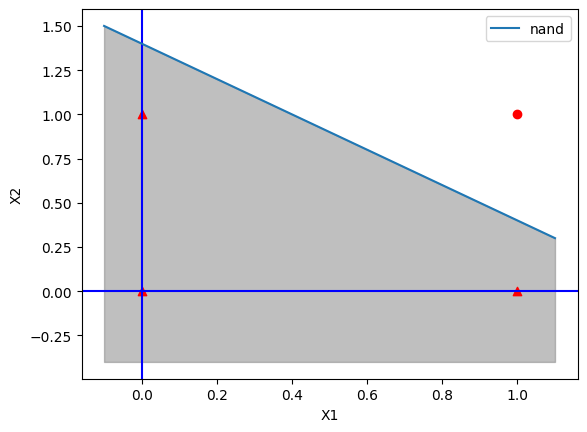

In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import matplotlib

#x1 = np.arange(-0.1, 1.1, 1)
#x2 = -x1 + 0.4
x1 = np.arange(-0.1, 1.3, 0.2)
x2 = -x1 + 1.4

plt.axvline(x=0, color = 'b')  # draw x =0 axes
plt.axhline(y=0, color = 'b')  # draw y =0 axes

# 그래프 그리기
#plt.plot(x1, x2, label="or")
plt.plot(x1, x2, label="nand")
plt.xlabel("X1") # x축 이름
plt.ylabel("X2") # y축 이름
plt.legend()

#plt.fill_between(x1, x2, '-3', color='grey', alpha='0.5')
plt.fill_between(x1, x2, -0.4, color='grey', alpha=0.5)

#plt.scatter([0],[0],marker='o',color='r')
#plt.scatter([1,0,1],[0,1,1],marker='^',color='r')
plt.scatter([0,1,0],[0,0,1],marker='^',color='r')
plt.scatter([1],[1],marker='o',color='r')

plt.show()